#### Changes to make
* check list of accepted openslide formats before adding files to list

In [10]:
import tensorflow as tf
from openslide import open_slide
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt

%matplotlib inline

In [15]:
class SlideLoader:
    def __init__(self, crop_dims=(512, 512), data_dir='.'):
        self.data_dir = data_dir
        self.crop_dims = crop_dims
        self.files = [f for f in listdir(data_dir) if isfile(join(data_dir, f))]
        
    def _filepath(self, file_idx):
        return join(self.data_dir, self.files[file_idx])
    
    def get_crop_batch(self, n_crops):
        slide = open_slide(self._filepath(0))
        crop = slide.read_region([2500, 2500], 0, self.crop_dims)
        return crop

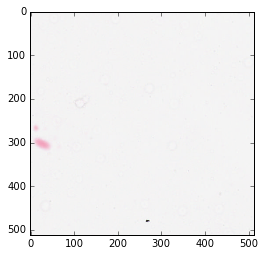

In [16]:
m = SlideLoader(data_dir='../Data/Myositis/')
img = m.get_crop_batch(5)
plt.imshow(img)